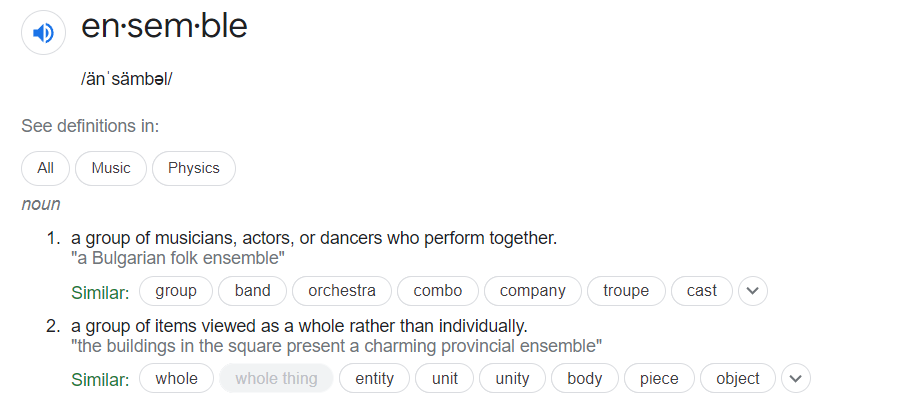

https://en.wikipedia.org/wiki/Ensemble_learning

# Ensemble learning

- In statistics and machine learning, ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.


-  Unlike a statistical ensemble in statistical mechanics, which is usually infinite, a machine learning ensemble consists of only a concrete finite set of alternative models, but typically allows for much more flexible structure to exist among those alternatives.

https://scikit-learn.org/stable/modules/ensemble.html

- The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.


- Two families of ensemble methods are usually distinguished:


- In averaging methods, the driving principle is to build several estimators independently and then to average their predictions. 
- On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.


    - Examples: Bagging methods, Forests of randomized trees, …



- By contrast, in boosting methods, base estimators are built sequentially and one tries to reduce the bias of the combined estimator.
- The motivation is to combine several weak models to produce a powerful ensemble.

    - Examples: AdaBoost, Gradient Tree Boosting, …

     ____________________________________________________    
     ____________________________________________________    
   _____________    _______________________________________    
    

    Group of Multiple Models : 
        used together . 
        creates a more powerful algorithm.
        
    multiple models  
    M1 M2 .... Mk . (called "Base learners")
    {______________}
        combine 
        
        
        = "M" --> more powerful 
                    (better performance)
                    
                    
____________________________________________________    

____________________________________________________    
        
### Types of Ensemble Model : 
    
    1. Bagging  -> Random Forest
    2. Boosting -> XGBoost 
    3. Stacking 
    4. Cascading  ---used in industry specific to domain . 
        


    
        

### Bagging : 


### Bagging meta-estimator

- In ensemble algorithms, bagging methods form a class of algorithms which build several instances of a black-box estimator on random subsets of the original training set and then aggregate their individual predictions to form a final prediction.
- These methods are used as a way to reduce the variance of a base estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it. 
- In many cases, bagging methods constitute a very simple way to improve with respect to a single model, without making it necessary to adapt the underlying base algorithm.
- As they provide a way to reduce overfitting, bagging methods work best with strong and complex models (e.g., fully developed decision trees), in contrast with boosting methods which usually work best with weak models (e.g., shallow decision trees).


- Bagging methods come in many flavours but mostly differ from each other by the way they draw random subsets of the training set:

- When random subsets of the dataset are drawn as random subsets of the samples, then this algorithm is known as Pasting.

- When samples are drawn with replacement, then the method is known as Bagging.


- When random subsets of the dataset are drawn as random subsets of the features, then the method is known as Random Subspaces.


- Finally, when base estimators are built on subsets of both samples and features, then the method is known as Random Patches.


- In scikit-learn, bagging methods are offered as a unified BaggingClassifier meta-estimator (resp. BaggingRegressor), taking as input a user-specified base estimator along with parameters specifying the strategy to draw random subsets. 

- In particular, max_samples and max_features control the size of the subsets (in terms of samples and features), while bootstrap and bootstrap_features control whether samples and features are drawn with or without replacement. 
- When using a subset of the available samples the generalization accuracy can be estimated with the out-of-bag samples by setting oob_score=True. 


        >>> from sklearn.ensemble import BaggingClassifier
        >>> from sklearn.neighbors import KNeighborsClassifier
        >>> bagging = BaggingClassifier(KNeighborsClassifier(),
        ...                             max_samples=0.5, max_features=0.5)

### - Bootstrapped Aggregation  :

        -- Boostrap Sampling : 
            sampling with replacement 
            
        -- Aggregation: averaging , count, median
        
        


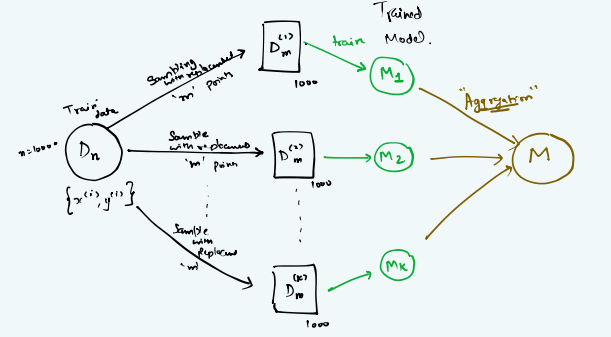

    from Dataset D :
    after train test split : 
        
    
    from X_train data , lets say n= 10,000 data points 
    
                   
    take m1 = 1000 Boostrap samples ... train model  M1
    take m2 = 1000 Boostrap samples ... train model  M2         M
    take m3 = 1000 Boostrap samples ... train model  M3     Aggregation
    .                                                          
    .
    .
    take mk = 1000 Boostrap samples ... train model  Mk
    
    
      M << n 
      
      
      
      In Classification: 
          aggregation we will do is Majority of predictions. 
        
      In regression : 
          aggregation can be done by taking average of prediction .
          (mean , median)
          
          
          
          

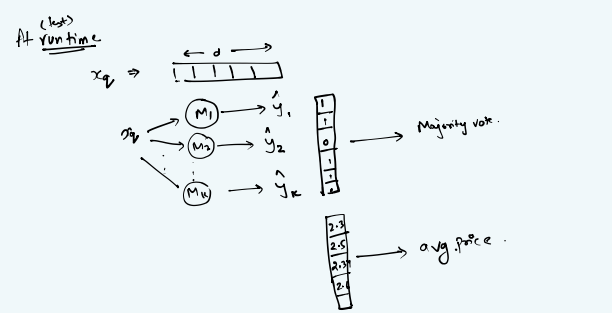

_____________________________________________
### Model Variance: 
    
    Complex model : High variance model : overfitting case: 
    in such case model is dependent on every single point . 
    ____________________________________________________
    
    if we drop some points from all learner. which happens in boostrapping .
    final model will not have a very high variance.
    
        
    
    - Using Bagging .overall  we can reduce the model variance. 
    
    
    
    In bagging,  all individual models with high variance + low bias.
    
    
    All base Learners : [High variance + Low Bias]
        (for example, kNN with small k neighbors, 
            decision tree with high depth)
            
    M :  aggregation of all learners . the final model : 
    will have REDUCED VARIANCE  + LOW BIAS. 
    
    
    Bagging can have no impact on biasness, thats why base learners(Mi) must have low bias . 

    More the Base learners , we tends to reduce variance more n more. 
    
    
    

## Forests of randomized trees

- The sklearn.ensemble module includes two averaging algorithms based on randomized decision trees: 
    - the RandomForest algorithm and
    - the Extra-Trees method.
- Both algorithms are perturb-and-combine techniques  specifically designed for trees. 
- This means a diverse set of classifiers is created by introducing randomness in the classifier construction.
- The prediction of the ensemble is given as the averaged prediction of the individual classifiers.


- As other classifiers, forest classifiers have to be fitted with two arrays: a sparse or dense array X of shape (n_samples, n_features) holding the training samples, and an array Y of shape (n_samples,) holding the target values (class labels) for the training samples:

        >>> from sklearn.ensemble import RandomForestClassifier
        >>> X = [[0, 0], [1, 1]]
        >>> Y = [0, 1]
        >>> clf = RandomForestClassifier(n_estimators=10)
        >>> clf = clf.fit(X, Y)

# Random Forest : 


- In random forests , each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set.


- Furthermore, when splitting each node during the construction of a tree, the best split is found either from all input features or a random subset of size max_features. 


- The purpose of these two sources of randomness is to decrease the variance of the forest estimator. 
- Indeed, individual decision trees typically exhibit high variance and tend to overfit. 
- The injected randomness in forests yield decision trees with somewhat decoupled prediction errors.
- By taking an average of those predictions, some errors can cancel out.
- Random forests achieve a reduced variance by combining diverse trees, sometimes at the cost of a slight increase in bias. 
- In practice the variance reduction is often significant hence yielding an overall better model.


- the scikit-learn implementation combines classifiers by averaging their probabilistic prediction, instead of letting each classifier vote for a single class.


## Extremely Randomized Trees

- In extremely randomized trees , randomness goes one step further in the way splits are computed. 
- As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. 
- This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias:


        >>> from sklearn.model_selection import cross_val_score
        >>> from sklearn.datasets import make_blobs
        >>> from sklearn.ensemble import RandomForestClassifier
        >>> from sklearn.ensemble import ExtraTreesClassifier
        >>> from sklearn.tree import DecisionTreeClassifier

        >>> X, y = make_blobs(n_samples=10000, n_features=10, centers=100,
        ...     random_state=0)

        >>> clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
        ...     random_state=0)
        >>> scores = cross_val_score(clf, X, y, cv=5)
        >>> scores.mean()
        0.98...

        >>> clf = RandomForestClassifier(n_estimators=10, max_depth=None,
        ...     min_samples_split=2, random_state=0)
        >>> scores = cross_val_score(clf, X, y, cv=5)
        >>> scores.mean()
        0.999...

        >>> clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
        ...     min_samples_split=2, random_state=0)
        >>> scores = cross_val_score(clf, X, y, cv=5)
        >>> scores.mean() > 0.999
        True

### Random Forst
    - grouped multiple trees : 
        
     - Bootstrap sampling : 
        all trees get different bootstrapped data : 
                    
                        (Base Model)
        Random Forst : Decision Tree + Row sampling + Feature Sampling  +  Aggregation 
        
        
        
        # of sampling << # of entire data points
        # of feature sampling  << #  of all features. 
        
        

### Out of Bag (OOB) score in Random Forest

https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710

- Out of bag (OOB) score is a way of validating the Random forest model.
- Below is a simple intuition of how is it calculated followed by a description of how it is different from validation score and where it is advantageous.


- For the description of OOB score calculation, let’s assume there are five DTs in the random forest ensemble labeled from 1 to 5. 
- For simplicity, suppose we have a simple original training data set as below.

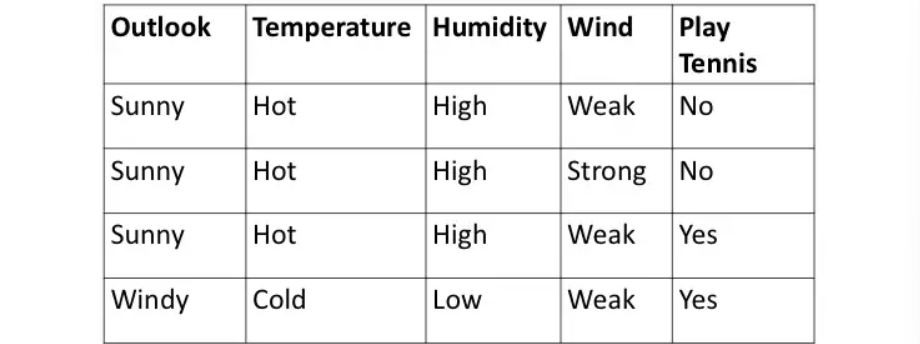

- Let the first bootstrap sample is made of the first three rows of this data set as shown in the green box below. This bootstrap sample will be used as the training data for the DT “1”.

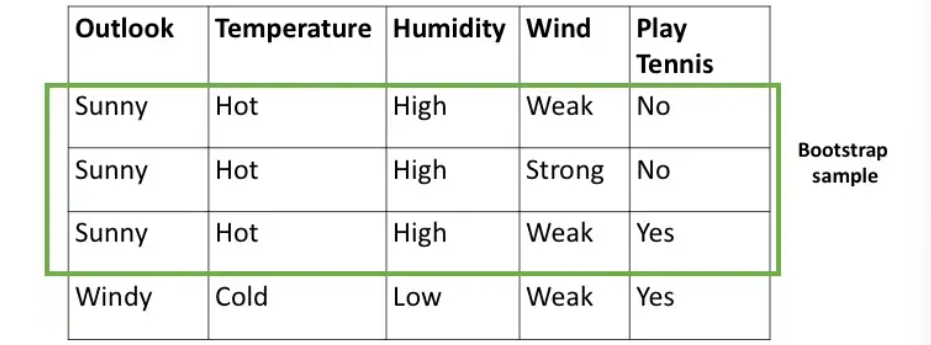

- Then the last row that is “left out” in the original data (see the red box in the image below) is known as Out of Bag sample.
- This row will not be used as the training data for DT 1.
- Please note that in reality there will be several such rows which are left out as Out of Bag, here for simplicity only one is shown.


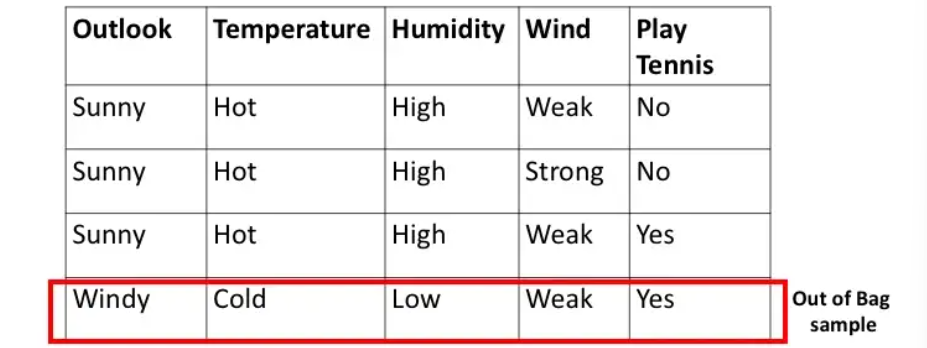

- After the DTs models have been trained, this leftover row or the OOB sample will be given as unseen data to the DT 1. 
- The DT 1 will predict the outcome of this row. Let DT 1 predicts this row correctly as “YES”. 
- Similarly, this row will be passed through all the DTs that did not contain this row in their bootstrap training data. 
- Let’s assume that apart from DT 1, DT 3 and DT 5 also did not have this row in their bootstrap training data.
- The predictions of this row by DT 1, 3, 5 are summarized in the table below.


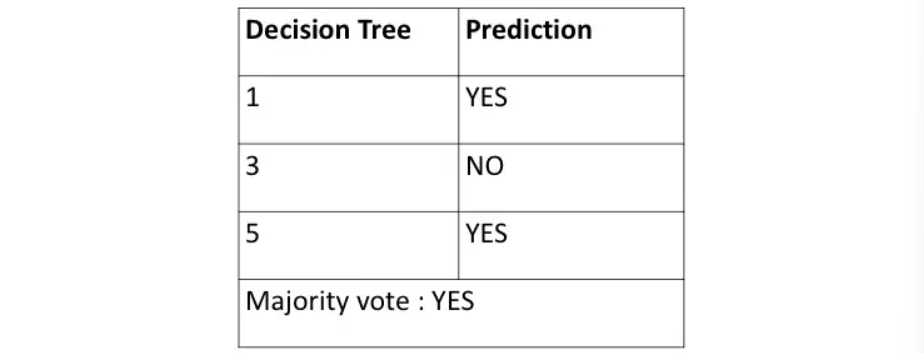

- We see that by a majority vote of 2 “YES” vs 1 “NO” the prediction of this row is “YES”. 
- It is noted that the final prediction of this row by majority vote is a correct prediction since originally in the “Play Tennis” column of this row is also a “YES”.


- Similarly, each of the OOB sample rows is passed through every DT that did not contain the OOB sample row in its bootstrap training data and a majority prediction is noted for each row.


- And lastly, the OOB score is computed as the number of correctly predicted rows from the out of bag sample.




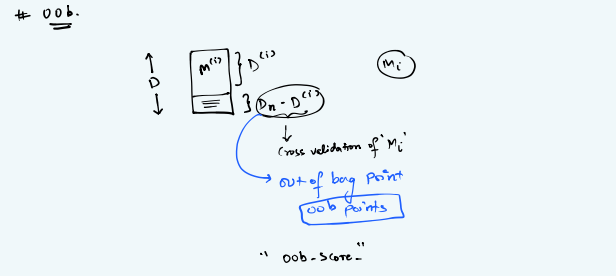

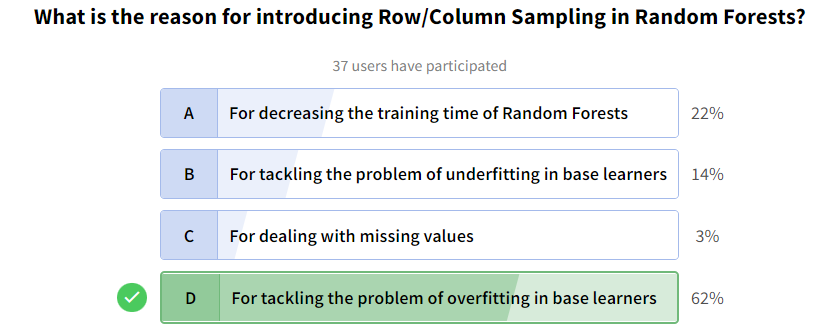

### RF : bias variance trade-off : 

    as number of base learner model increases .overall RF model variance decreases
    
    
    

        Column Sampling Ratio : selected features for base learner   (CSR)
                                       /out of all features 
         
        Row sampling Ratio :  selected numberof data points /       (RSR)
                                  all the data points.
                                  
                                  
        if CSR :decrease: decrease selected features for base learners  
             underfit - (overfitting will reduce.)
             variance will be less.
             
        RSR - row sampling decrease  , 
             overfitting will decrease.
             variance will be less. 
                                       
                                       
        Good CSR ~~ 25-30% yet depends on data 
        and RSR ~~ 40%
        

### Time and Space Complexity : 

    TC and SC will be higher than simple decision tree. 
    
    train time for 1 DT : O(nlog(n)*d)
          
          we train k-decision trees : 
             
             TC for RF : O(nlog(n)*d*k)
             
             
       
     Run-time Complexity of 1 DT : O(depth of tree)
     
     
     
     for RF : Numberr of DTs * depth of each tree 
     Run-time Complexity : O(depth of tree * k)
     
             
             
    for RF
    SC : O(nodes * k)

_____________________________________________    
    sklearn.ensemble.RandomForestClassifier
    
    class sklearn.ensemble.RandomForestClassifier
                (
                    n_estimators=100,      # number of DTs
                    criterion='gini', 
                    max_depth=None,           # expands till all nodes are pure
                    min_samples_split=2,      
                    min_samples_leaf=1, 
                    min_weight_fraction_leaf=0.0,
                    max_features='sqrt', 
                    max_leaf_nodes=None,
                    min_impurity_decrease=0.0, 
                    bootstrap=True, 
                    oob_score=False,
                    n_jobs=None, 
                    random_state=None,
                    verbose=0, 
                    warm_start=False,
                    class_weight=None, 
                    ccp_alpha=0.0, 
                    max_samples=None
                )

In [65]:
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")
X_test =  pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")
X_train.shape,y_train.shape,X_test.shape,y_test.shape



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

((1102, 36), (1102, 1), (368, 36), (368, 1))

In [66]:

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote,y_smote = smote.fit_resample(X_train,y_train)
X_smote.shape,y_smote.shape

((1848, 36), (1848, 1))

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate


DT = DecisionTreeClassifier(    # default parameter 
    criterion='gini',
    max_depth=4,
    random_state=7)



cv_results = cross_validate(DT,
              X_smote,
              y_smote,
              scoring="accuracy",
              cv=10,
              return_train_score=True)  # also return train score 

In [68]:
cv_results["train_score"].mean(),cv_results["test_score"].mean()

(0.8398272714394744, 0.8030699177438307)

In [69]:
cv_results["train_score"].std(),cv_results["test_score"].std()

(0.010927597724345216, 0.10484348030893492)

In [71]:
# y_smote.values.ravel()

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate


RFC = RandomForestClassifier(random_state=7,
                            max_depth=7,        # for individual learners
                            n_estimators = 300,   # how many DT-trees 
                            oob_score=True) 


cv_results = cross_validate(RFC,
              X_smote,
              y_smote.values.ravel(),
              scoring="accuracy",
              cv=10,
              return_train_score=True)  # also return train score 


In [89]:
cv_results["train_score"].mean(),cv_results["test_score"].mean()

(0.9638049140802073, 0.9026674500587545)

In [90]:
cv_results["train_score"].std(),cv_results["test_score"].std()

(0.005225480961088354, 0.10276703073236744)

In [94]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=7,
                            max_depth=7,        # for individual learners
                            n_estimators = 300,   # how many DT-trees 
                            oob_score=True) 
RFC.fit(X_smote,y_smote.values.ravel())


RandomForestClassifier(max_depth=7, n_estimators=300, oob_score=True,
                       random_state=7)

In [95]:
RFC.score(X_test,y_test)

0.8586956521739131

In [102]:
# X_smote.columns

In [101]:
# RFC.feature_importances_

In [99]:
importance = pd.DataFrame(data=(RFC.feature_importances_),
                          columns=["feature_imp"],
                          index=['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'])

<IPython.core.display.Javascript object>

In [106]:
importance[importance["feature_imp"]>0].index

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

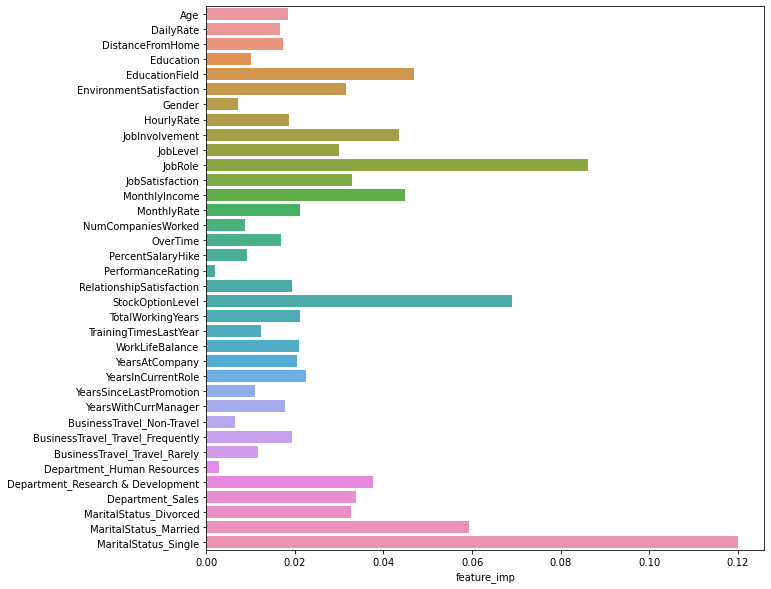

In [115]:
plt.figure(figsize=(10,10))
importance[importance["feature_imp"]>0]
sns.barplot(y = importance[importance["feature_imp"]>0].index,
           x = importance[importance["feature_imp"]>0]["feature_imp"])
# plt.yticks(rotation = 90)
plt.show()

### Feateure Importance in RF : 
    
    in 1 DT , we find entroy/gini of node and Information gain , based on this information we find the importance of feature. 
    
    similarly ,we find feature importance from all DTs. 
    
    It may be possible , not all feautres were involved in all of the DTs. In such case that feature importance might be 0 for that DT. 
    for RF , we take the average of all the DTs feautre impoartances .
    
    basically : Taking the feature importance from everysingle tree and taking the average. 
    

### ccp_alpha : (hyperparameter): cost complexity pruning : 
    
    - ccp_alphanon-negative float, 
    - default=0.0
    - Complexity parameter used for Minimal Cost-Complexity Pruning. 
    - The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen.
    - By default, no pruning is performed. See Minimal Cost-Complexity Pruning for details.
    
    
    PURPOSE: cut some branches, to reduce the complexity. 
    
    
    
    if we compare to Logisitc or Linear regression , 
    
    objective function can be visualised as : 
    
        minimise [ Entropy     +   ccp-alpha # number of nodes ]
                   impurity
     
     if ccp-alpha == 1 : shallow DT , undefit case.
                  == 0 : large DT.    overfit case. 
                  
                  
     ## Hyperparameters : 

    # number of Base learners
    # depth of individual trees
    # column sampling ratio
    # row sampling ratio
    # ccp-alpha : number of nodes              


In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate


RFC = RandomForestClassifier(random_state=7,
                            max_depth=7,        # for individual learners
                            n_estimators = 100,   # how many DT-trees 
                            oob_score=True,
                            ccp_alpha=0) 


cv_results = cross_validate(RFC,
              X_smote,
              y_smote.values.ravel(),
              scoring="accuracy",
              cv=10, 
              return_train_score=True)  # also return train score 


print(cv_results["train_score"].mean(),cv_results["test_score"].mean())

RFC.fit(X_smote,y_smote.values.ravel())
RFC.score(X_test,y_test.values.ravel())

0.963444264882742 0.9010428907168038


0.8532608695652174

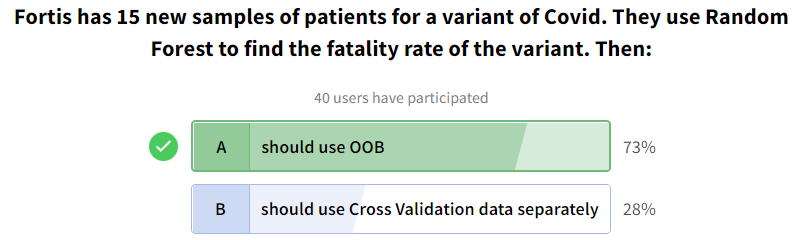

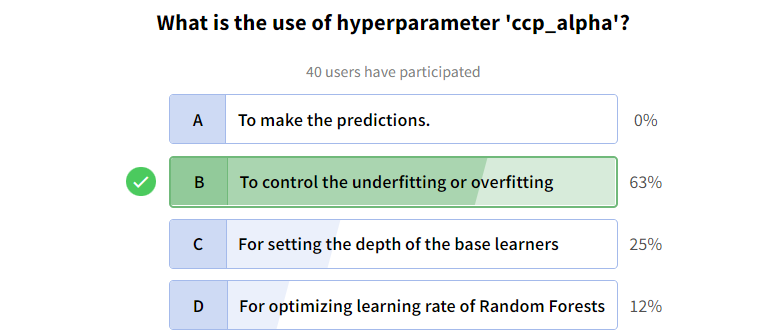